In [1]:
import cv2
import numpy as np
import os
from matplotlib.pyplot import imshow
%matplotlib inline
working_directory = "/home/piotr/Desktop/PycharmProjects/Vessels Recognition/images/all/"

In [2]:
file = 'images/01_dr.JPG'
full_path = os.path.join(working_directory, file)
image = cv2.imread(full_path, 1)
orginal_imnage = cv2.imread(full_path, 1)
b, g, r = cv2.split(image)

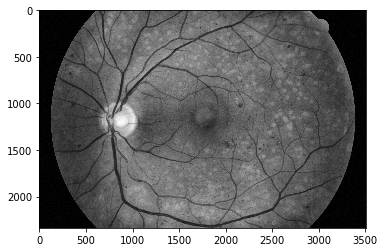

In [3]:
# CLAHE - contrast limited adaptive histogram equalization - poprawia kontrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_g = clahe.apply(g)
imshow(clahe_g, cmap="gray")

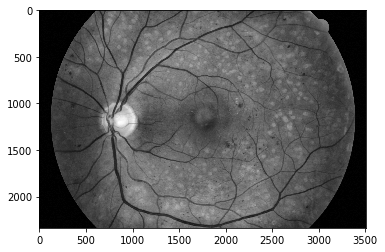

In [4]:
# applying morphologies
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
m1 = cv2.morphologyEx(clahe_g, cv2.MORPH_OPEN,
                          structuring_element, iterations=1)
c1 = cv2.morphologyEx(m1, cv2.MORPH_CLOSE, structuring_element, iterations=1)
imshow(c1, cmap="gray")

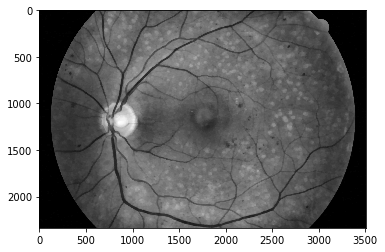

In [5]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
m2 = cv2.morphologyEx(c1, cv2.MORPH_OPEN,
                          structuring_element, iterations=1)
c2 = cv2.morphologyEx(m2, cv2.MORPH_CLOSE, structuring_element, iterations=1)
imshow(c2, cmap="gray")

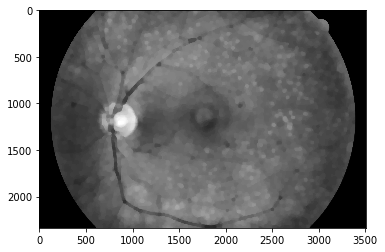

In [6]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
m3 = cv2.morphologyEx(c2, cv2.MORPH_OPEN,
                          structuring_element, iterations=1)
c3 = cv2.morphologyEx(m3, cv2.MORPH_CLOSE, structuring_element, iterations=1)
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
imshow(c3, cmap="gray")

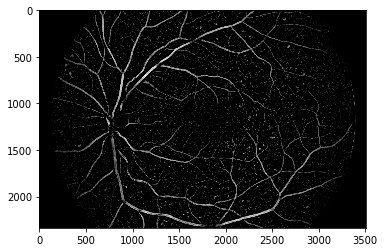

In [7]:
# subtracting clahe_g from c3
subtr = cv2.subtract(c3, clahe_g)
clahe_subtr = clahe.apply(subtr)
imshow(clahe_subtr, cmap="gray")

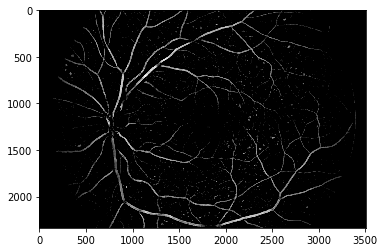

In [8]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
o1 = cv2.morphologyEx(clahe_subtr, cv2.MORPH_OPEN,
                          structuring_element, iterations=1)
c1 = cv2.morphologyEx(o1, cv2.MORPH_CLOSE,
                          structuring_element, iterations=1)
imshow(c1, cmap="gray")

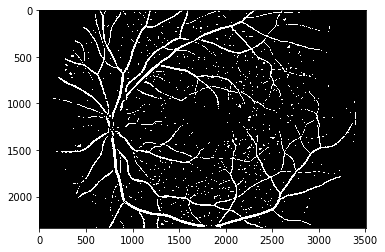

In [9]:
# thresholding
ret, thresh = cv2.threshold(c1, 15, 255, cv2.THRESH_BINARY)
imshow(thresh, cmap="gray")

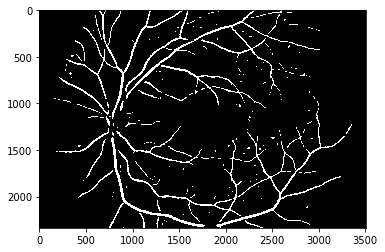

In [10]:
median = cv2.medianBlur(thresh, 9)
median = cv2.medianBlur(median, 9)
median = cv2.medianBlur(median, 9)
median = cv2.medianBlur(median, 9)
median = cv2.medianBlur(median, 9)

ret, thresh2 = cv2.threshold(median, 250, 255, cv2.THRESH_BINARY)
imshow(thresh2, cmap="gray")

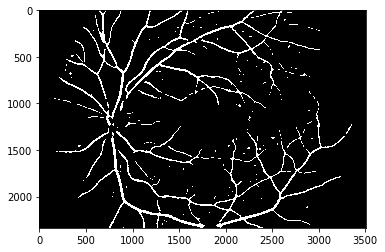

In [11]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
c1 = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE,
                          structuring_element, iterations=15)

imshow(c1, cmap="gray")

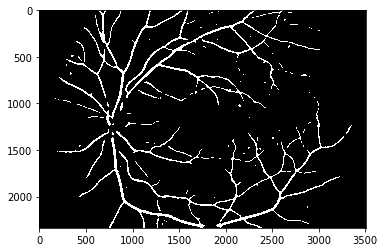

In [12]:
median2 = cv2.medianBlur(c1, 9)
median2 = cv2.medianBlur(median2, 9)
median2 = cv2.medianBlur(median2, 9)
median2 = cv2.medianBlur(median2, 9)

ret, thresh3 = cv2.threshold(median2, 250, 255, cv2.THRESH_BINARY)
imshow(thresh3, cmap="gray")

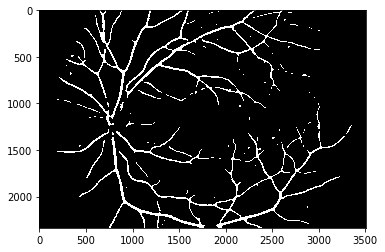

In [13]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
c2 = cv2.morphologyEx(thresh3, cv2.MORPH_CLOSE,
                          structuring_element, iterations=3)

imshow(c2, cmap="gray")

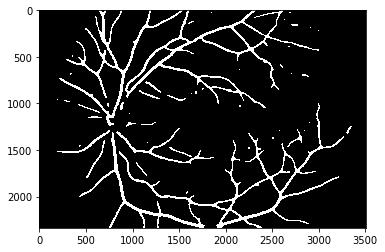

In [14]:
median3 = cv2.medianBlur(c2, 9)
median3 = cv2.medianBlur(median3, 9)
median3 = cv2.medianBlur(median3, 9)
median3 = cv2.medianBlur(median3, 9)

kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(median3, kernel, iterations=1)

median3 = cv2.medianBlur(dilated, 13)
median3 = cv2.medianBlur(median3, 13)
median3 = cv2.medianBlur(median3, 13)

ret, thresh4 = cv2.threshold(median3, 250, 255, cv2.THRESH_BINARY)
imshow(thresh4, cmap="gray")

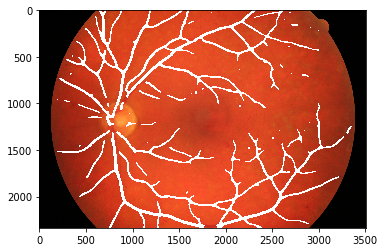

In [15]:
a = cv2.split(orginal_imnage)
for i, x in enumerate(a):
    x = cv2.add(x, thresh4)
    a[i] = x
result = cv2.merge(a)[...,::-1]
imshow(result)

In [29]:
def mse(processed, perfect):
    err = np.float64(0.0)
    partial_s = np.uint64(0)
    for i in range(0, len(processed)):
        for j in range(0, len(processed[0])):
            partial_s += np.uint64((int(processed[i, j]) - int(perfect[i, j])) ** 2)
            
        err += partial_s / (len(processed) ** 2)
        partial_s = np.uint64(0)
            
    return err

In [30]:
file = 'manual1/01_dr.tif'
full_path = os.path.join(working_directory, file)
perfect_output = cv2.imread(full_path, 0)

print(mse(thresh4, perfect_output))

6020.950729132462
